In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv("dataset.csv")
df.shape

(42305, 13)

In [52]:
df2 = pd.read_csv("liked_songs.csv")
df3 = pd.read_csv("hindi.csv")
df4 = pd.read_csv("2021_data.csv")

In [59]:
all_songs = pd.concat([df2, df3, df4])

,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri
0,Run (feat. Ed Sheeran) (Taylor’s Version) (Fro...,0.610,0.488,3,-6.918,1,0.0293,0.81700,0.000000,0.312,0.443,125.039,spotify:track:4IQkfUsrwXol38VV3U7t7T
1,Beautiful Liar,0.764,0.751,8,-3.740,1,0.0703,0.00554,0.000237,0.164,0.418,91.977,spotify:track:2HWWNoWEEEECwZhAiLg7ib
2,World We Used To Know,0.480,0.692,11,-5.324,0,0.0582,0.17600,0.000110,0.221,0.465,85.343,spotify:track:5I9Qa1LfGcQGCIC32lh9Ka
3,Sorry,0.542,0.561,5,-7.029,0,0.0485,0.43700,0.070400,0.135,0.183,175.998,spotify:track:6k1Q8mNcA2jFH0uv5B6g9G
4,Paradise,0.777,0.582,0,-6.187,0,0.0354,0.15100,0.000000,0.109,0.681,148.921,spotify:track:0QrLeOy3DCNBNQoEwZB1T3


In [61]:
names = all_songs['name']
all_songs_num = all_songs.drop(['name', 'uri'], axis=1)

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (-1,1))
all_songs_num_scaled = scaler.fit_transform(all_songs_num)

In [82]:
all_songs_num_scaled = pd.DataFrame(all_songs_num_scaled, columns=all_songs_num.columns)

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
all_songs_num_scaled_pca = pca.fit_transform(all_songs_num_scaled)

In [84]:
all_songs_num_scaled_pca.shape

(474, 8)

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
all_songs_num_scaled_pca = pca.fit_transform(all_songs_num_scaled)

In [88]:
pca.components_

array([[ 0.08912898,  0.18301246,  0.12822907,  0.12039988, -0.89746242,
         0.02754675, -0.33319387, -0.00936022, -0.03961043,  0.06286176,
         0.06927963],
       [-0.23096281, -0.35620847,  0.02767661, -0.26825234, -0.41777452,
        -0.02706955,  0.74301537,  0.08319024,  0.06104512, -0.06549534,
        -0.0690615 ]])

In [95]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(all_songs_num_scaled)
predct = kmeans.predict(all_songs_num_scaled)

C:\Users\harik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
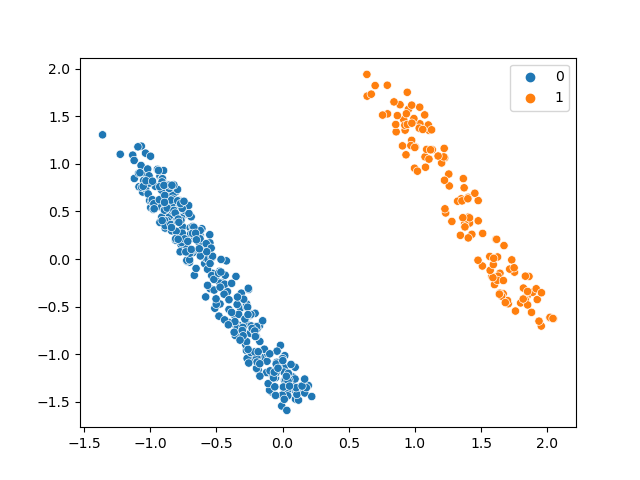

In [103]:
%matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(all_songs_num_scaled_pca[:,0], all_songs_num_scaled_pca[:,1], hue = predct)

In [97]:
predict2 = kmeans.fit_predict(all_songs_num)

In [98]:
pca2 = PCA(n_components=2)
all_songs_num_pca2 = pca2.fit_transform(all_songs_num)

C:\Users\harik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
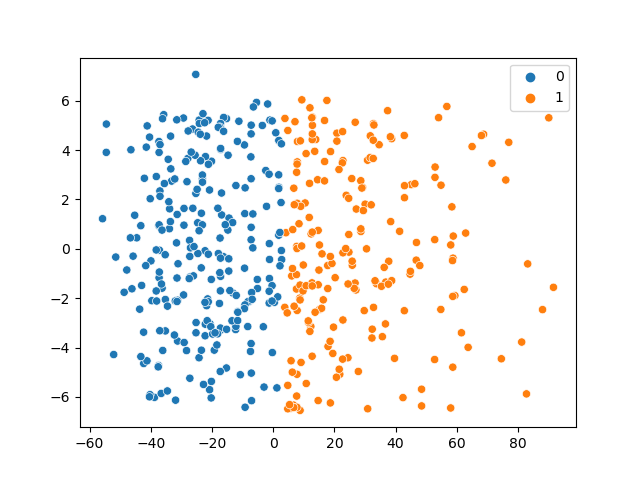

In [102]:
%matplotlib widget
sns.scatterplot(all_songs_num_pca2[:,0], all_songs_num_pca2[:,1], hue = predict2)
plt.show()